In [54]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Total License Count Data

In [2]:
df = pd.read_csv('license_counts.csv')
df.head()

,cc-by,cc-by-sa,cc-by-nd,cc-by-nc,cc-by-nc-sa,cc-by-nc-nd
0,12717,2614,552,6352,20320,4438


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

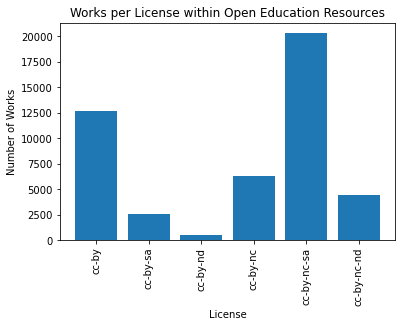

In [3]:
plt.bar(df.columns, df.iloc[0])
plt.title("Works per License within Open Education Resources")
plt.xlabel("License")
plt.ylabel("Number of Works")
plt.xticks(rotation=90)

# Licensed Works Data

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
oer_df = pd.read_csv("oer.csv", delimiter='\t')

In [6]:
oer_df = oer_df.rename(columns={"Education Level": "education_level", "Subject Area": "subject_area", "Material Type": "material_type", "Media Format": "media_format", "Primary User": "primary_user", "Educational Use": "educational_use"})

In [7]:
oer_df['modification_date'] = oer_df['modification_date'].apply(pd.to_datetime)

In [8]:
# Expand columns
new_columns = {
    "education_level": [],
    "subject_area": [],
    "material_type": [],
    "media_format": [],
    "Languages": [],
    "primary_user": [],
    "educational_use": []
}
new_columns

{'education_level': [],
 'subject_area': [],
 'material_type': [],
 'media_format': [],
 'Languages': [],
 'primary_user': [],
 'educational_use': []}

In [9]:
def get_unique_values(column):
    lst = oer_df[column].unique()
    set_items = set()
    # Get unique values
    for item in lst:
        split = str(item).split(",")
        for value in split:
            set_items.add(value)
    # Create new columns
    for item in set_items:
        oer_df[f'{column}_{item}'] = False
        new_columns[column].append(f'{column}_{item}')
    # return set_items

for key in new_columns:
    get_unique_values(key)

new_columns

{'education_level': ['education_level_preschool',
  'education_level_adult-education',
  'education_level_graduate-professional',
  'education_level_community-college-lower-division',
  'education_level_upper-primary',
  'education_level_nan',
  'education_level_career-technical',
  'education_level_college-upper-division',
  'education_level_middle-school',
  'education_level_lower-primary',
  'education_level_high-school'],
 'subject_area': ['subject_area_ratios-and-proportions',
  'subject_area_finance',
  'subject_area_life-science',
  'subject_area_anthropology',
  'subject_area_zoology',
  'subject_area_environmental-science',
  'subject_area_arts-and-humanities',
  'subject_area_mathematics',
  'subject_area_social-work',
  'subject_area_maritime-science',
  'subject_area_reading-informational-text',
  'subject_area_visual-arts',
  'subject_area_linguistics',
  'subject_area_numbers-and-operations',
  'subject_area_geology',
  'subject_area_reading-foundation-skills',
  'subject

In [10]:
def expand_columns(row):
    for key in new_columns:
        split = str(row[key]).split(",")
        for item in split:
            row[f'{key}_{item}'] = True
    return row

In [11]:
oer_df = oer_df.apply(expand_columns, axis=1)

In [12]:
oer_df.head()

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,...,primary_user_student,primary_user_administrator,primary_user_nan,primary_user_parent,educational_use_informal-education,educational_use_curriculum-instruction,educational_use_assessment,educational_use_other,educational_use_nan,educational_use_professional-development
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,...,False,False,False,False,False,True,False,False,False,False
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,...,False,False,True,False,False,False,False,False,True,False
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,...,False,False,False,False,False,False,False,False,False,True
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,...,True,False,False,False,False,True,False,False,False,False


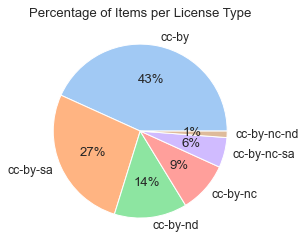

In [38]:
#Create pie chart visualization - showing the percentage of items that are attached to each CC license type
sns.set_theme(font="arial", font_scale=1.1)
plt.pie(oer_df['license'].value_counts(), labels = oer_df['license'].unique(), 
        colors = sns.color_palette('pastel')[0:6], autopct='%.0f%%')
plt.title('Percentage of Items per License Type')
plt.show()

In [95]:
license = oer_df.groupby('license')
unique_media_type = license.apply(lambda x: x['media_format'].unique())
oer_df1 = oer_df.dropna(subset=['media_format'])
oer_df1['media_format_explode'] = oer_df1['media_format'].apply(lambda x: x.split(','))
oer_df1 = oer_df1.explode('media_format_explode')

license = oer_df1.groupby('license')
unique_media_type = license.apply(lambda x: x['media_format_explode'].unique())

['downloadable-docs' 'video' 'text-html' 'graphics-photos' 'interactive'
 'audio' 'ebook' 'other' 'mobile' 'braille-brf']


In [ ]:
plt.